### Importação dos dados



In [12]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


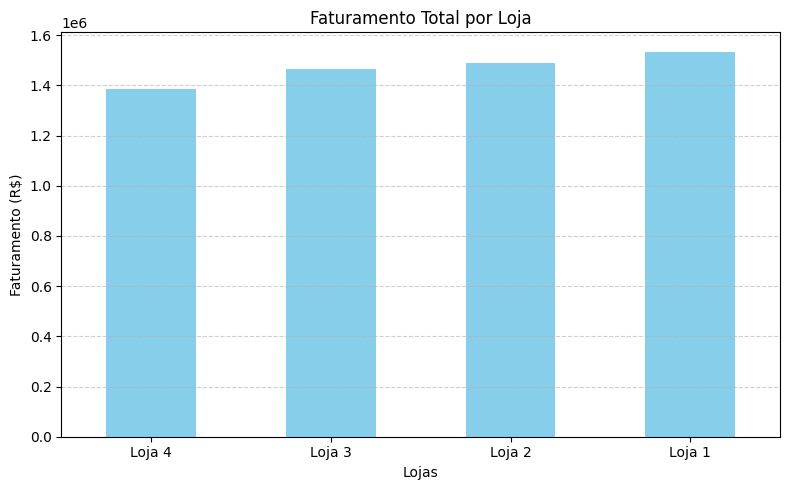

In [ ]:
# adicionando a coluna 'Loja' e dando valor de acordo com número da loja
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df = pd.concat([loja1, loja2, loja3, loja4])

# calculo de faturamento
faturamento_lojas = df.groupby('Loja')['Preço'].sum().sort_values()

# gráfico de barras
plt.figure(figsize=(8, 5))
faturamento_lojas.plot(kind='bar', color='skyblue')
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Pela análise é possível ver que a Loja 1 é a loja com mais faturamento entre as 4 lojas.

# 2. Vendas por Categoria


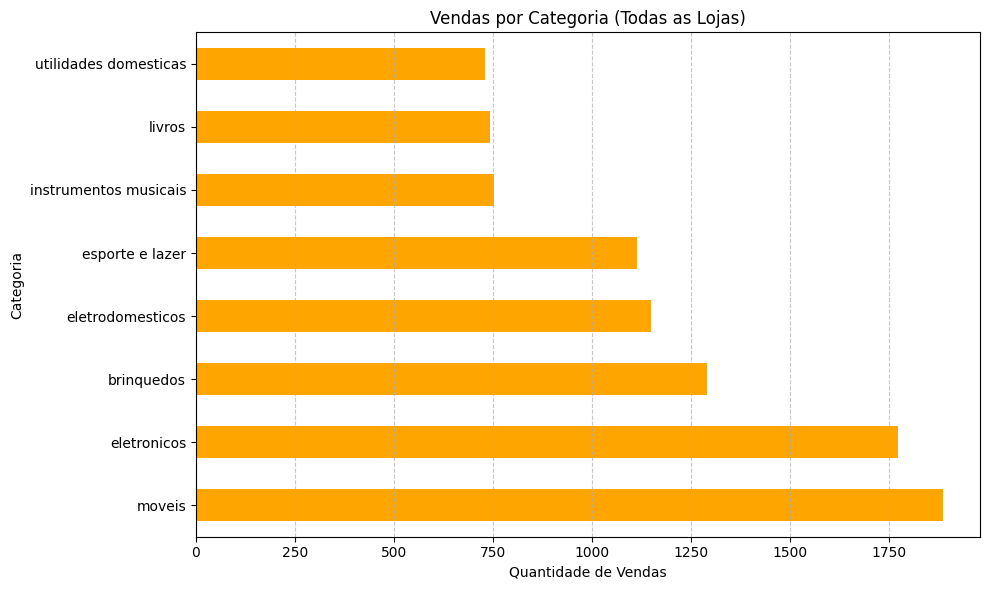

In [23]:
# vendas por categoria
vendas_categoria = df['Categoria do Produto'].value_counts()

# gráfico de barra horizontal (barh)
plt.figure(figsize=(10, 6))
vendas_categoria.plot(kind='barh', color='orange')
plt.title('Vendas por Categoria (Todas as Lojas)')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Categoria')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Pela análise de Vendas por Categoria, conclui-se que **Móveis** possui a maior *quantidade de vendas*.

# 3. Média de Avaliação das Lojas

Loja
Loja 1    3.976685
Loja 4    3.995759
Loja 2    4.037304
Loja 3    4.048326
Name: Avaliação da compra, dtype: float64


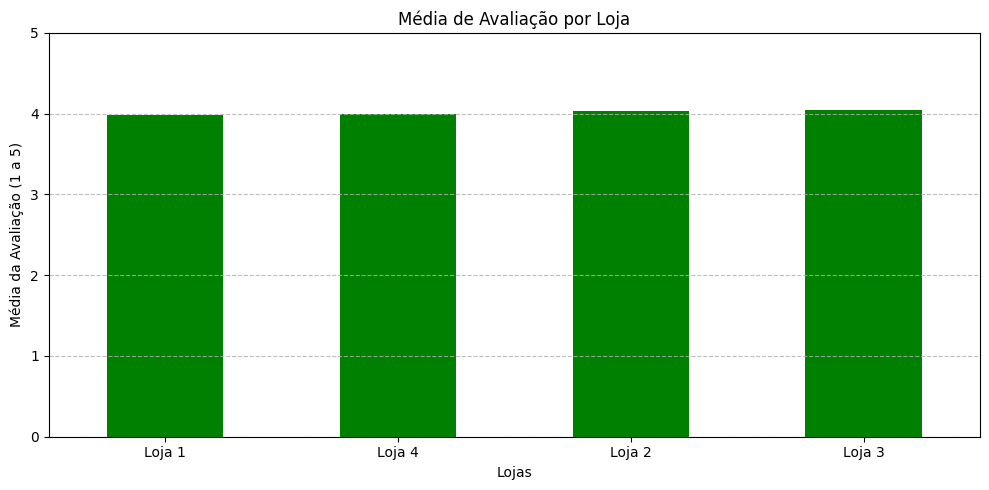

In [33]:
# média das avaliações por loja
avaliacoes_medias = df.groupby('Loja')['Avaliação da compra'].mean().sort_values()

print(avaliacoes_medias)

# gráfico de barra
plt.figure(figsize=(10, 5))
avaliacoes_medias.plot(kind='bar', color='green')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Média da Avaliação (1 a 5)')
plt.xlabel('Lojas')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Pela análise da Médias de Avaliação por Loja, concui-se que a **Loja 3** possui a *maior média de avaliação* dentre as 4 lojas.

# 4. Produtos Mais e Menos Vendidos

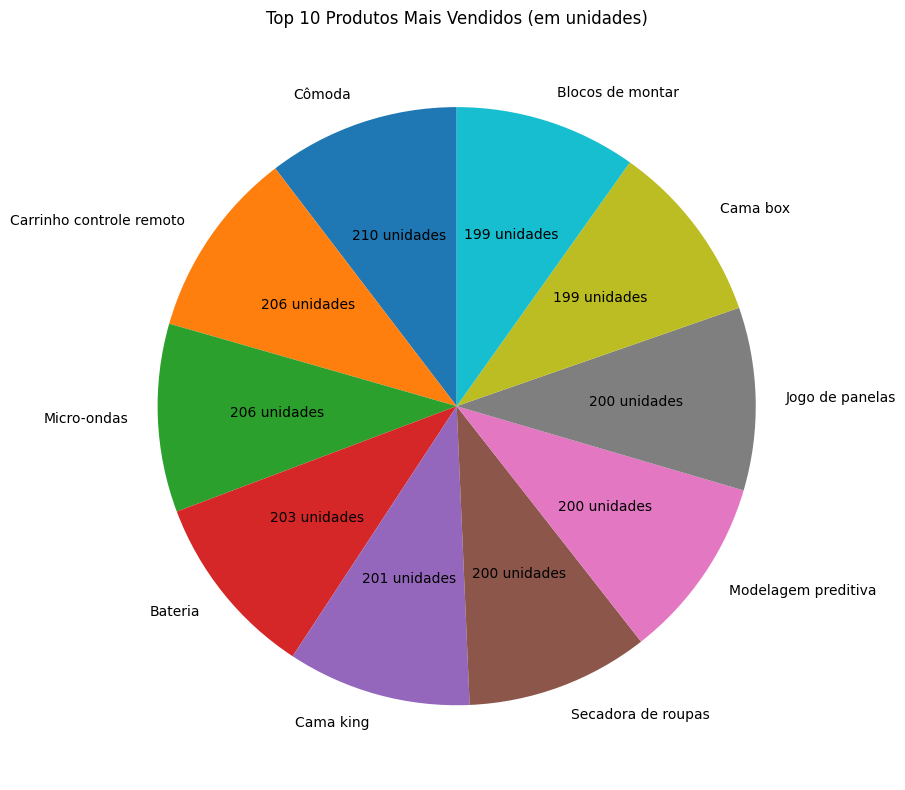

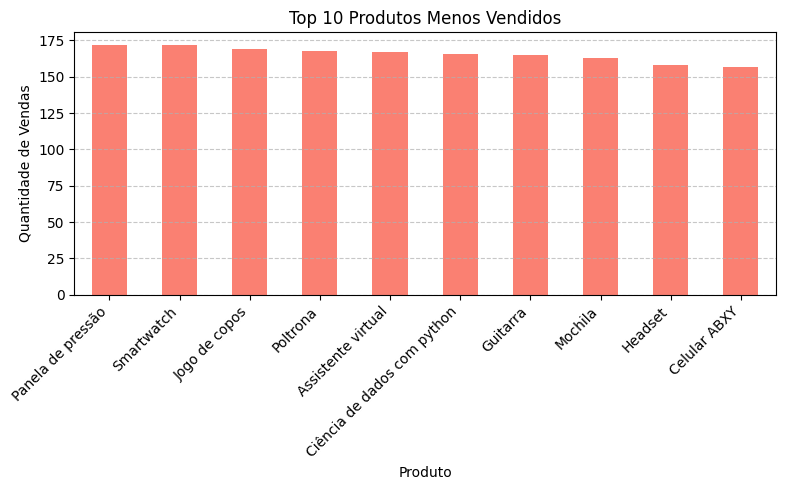

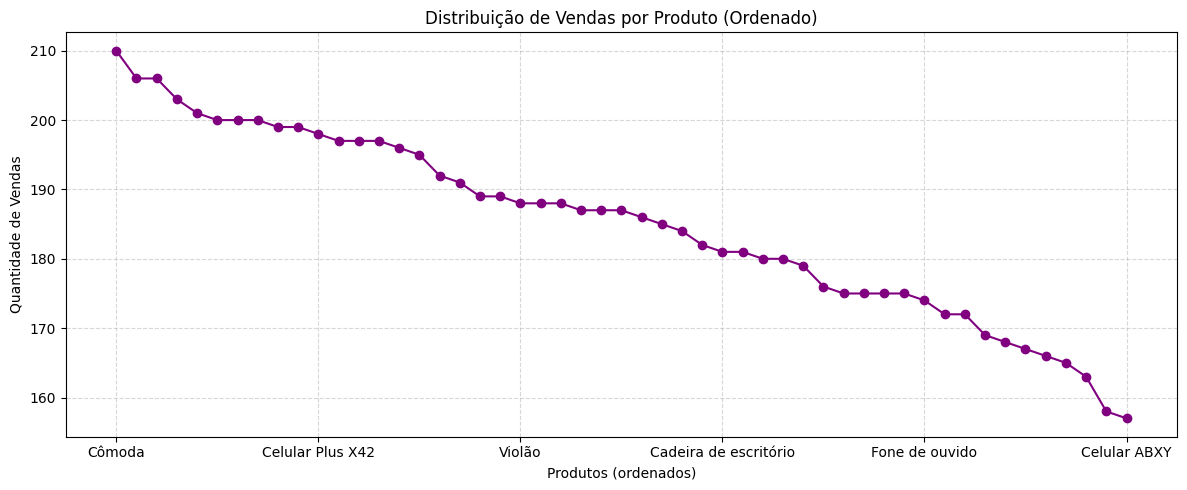

In [48]:
# vendas por produto
vendas_produtos = df['Produto'].value_counts()

# top 10 mais vendidos
top_10_mais = vendas_produtos.head(10)

# top 10 menos vendidos, usando .tail para pegar os 10 últimos
top_10_menos = vendas_produtos.tail(10)

# função para converter a porcentagem do gráfico de pizza em unidades vendidas
def mostrar_valor_absoluto(pct, total):
    valor = int(round(pct * total / 100.0))
    return f'{valor} unidades'

# total de vendas dos 10 mais vendidos
total_vendas_top10 = top_10_mais.sum()

# gráfico de pizza com valores por unidade vendidas
plt.figure(figsize=(10, 8))
top_10_mais.plot(
    kind='pie',
    autopct=lambda pct: mostrar_valor_absoluto(pct, total_vendas_top10),
    startangle=90,
    shadow=False
)
plt.title('Top 10 Produtos Mais Vendidos (em unidades)')
plt.ylabel('')
plt.tight_layout()
plt.show()

print('\n' * 3)  # quebra visual

# gráfico dos menos vendidos
plt.figure(figsize=(8, 5))
top_10_menos.plot(kind='bar', color='salmon')
plt.title('Top 10 Produtos Menos Vendidos')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print('\n' * 3)  # quebra visual

# gráfico de linha com alguns dos produtos como base
plt.figure(figsize=(12, 5))
vendas_produtos.plot(kind='line', color='purple', marker='o')
plt.title('Distribuição de Vendas por Produto (Ordenado)')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Produtos (ordenados)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Pela análise dos produtos mais e menos vendidos, conclui-se que o produto *mais* vendido é a **Cômoda** e o *menos* vendido é o **Celular ABXY**

# 5. Frete Médio por Loja


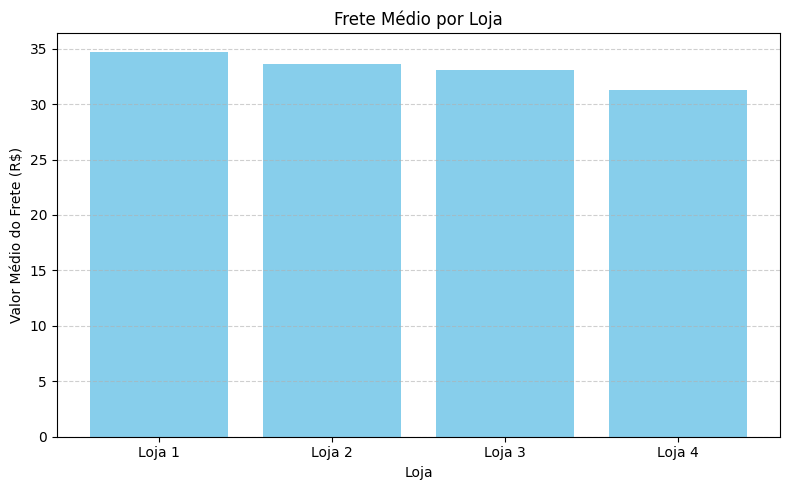

In [52]:
# frete medio por loja
frete_medio_por_loja = df.groupby('Loja')['Frete'].mean().reset_index()

# gráfico de barra
plt.figure(figsize=(8, 5))
plt.bar(frete_medio_por_loja['Loja'], frete_medio_por_loja['Frete'], color='skyblue')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Pela análise do Frete Médio por Loja, conclui-se que a **Loja 1** tem o valor *médio mais alto de frete* dentre as 4 lojas.

## Relatório

# Relatório de Análise para Decisão de Venda da Alura Store

Durante este desafio, analisamos dados de vendas, avaliações e desempenho das quatro lojas da rede Alura Store para auxiliar o Senhor João na decisão de qual loja vender para iniciar um novo empreendimento.

---

## 1. Faturamento

- **Loja 1** apresentou o **maior faturamento** entre as quatro lojas, indicando alta capacidade de geração de receita.

---

## 2. Média de Avalações

- **Loja 3** obteve a **melhor avaliação média** pelos clientes, demonstrando maior satisfação e potencial fidelização.

---

## 3. Frete Médio

- **Loja 1** apresentou o **frete médio mais alto**, o que pode impactar negativamente na competitividade e no custo para o cliente.

---

## Conclusão e Recomendação

Considerando que o objetivo é identificar a loja com **menor eficiência** para venda, recomendamos que o Senhor João venda a **Loja 4**, que não se destacou positivamente em faturamento, avaliação ou custos de frete durante as análises.

- **Loja 1**: Alto faturamento — manter para garantir receitas robustas.  
- **Loja 3**: Melhor avaliação — manter para valorizar o relacionamento com clientes.  
- **Loja 2**: Desempenho intermediário — manter para diversificação.  
- **Loja 4**: Desempenho inferior em todas as métricas — **candidata ideal para venda**.

---

Essa decisão visa maximizar o potencial de sucesso no novo empreendimento, ao mesmo tempo que otimiza o portfólio atual da rede Alura Store.  
